In [31]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [32]:
def generate_dataset(num_samples):
    X = np.random.uniform(-100, 100, size=(num_samples, 2))
    y = (np.sum(X, axis=1) >= 0).astype(int)
    return X, y

num_samples = 200000
X, y = generate_dataset(num_samples)

In [33]:
model = Sequential([
    Dense(256, input_dim=2, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [34]:
checkpoint = ModelCheckpoint('test.hdf5', monitor = "val_accuracy", verbose = 1, save_best_only = True)

In [35]:

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=1e-6),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
hist = model.fit(X, y, epochs=50, batch_size=512, validation_split=0.2, callbacks = [checkpoint])


Epoch 1/50
309/313 [============================>.] - ETA: 0s - loss: 4.8818 - accuracy: 0.2791
Epoch 1: val_accuracy improved from -inf to 0.28470, saving model to test.hdf5
313/313 [==============================] - 2s 3ms/step - loss: 4.8781 - accuracy: 0.2792 - val_loss: 4.7335 - val_accuracy: 0.2847
Epoch 2/50
 74/313 [======>.......................] - ETA: 0s - loss: 4.6757 - accuracy: 0.2837

/home/ubuntu/anaconda3/envs/speaking/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


293/313 [===========================>..] - ETA: 0s - loss: 4.5862 - accuracy: 0.2882
Epoch 2: val_accuracy improved from 0.28470 to 0.29517, saving model to test.hdf5
313/313 [==============================] - 1s 3ms/step - loss: 4.5752 - accuracy: 0.2888 - val_loss: 4.4326 - val_accuracy: 0.2952
Epoch 3/50
293/313 [===========================>..] - ETA: 0s - loss: 4.2886 - accuracy: 0.2995
Epoch 3: val_accuracy improved from 0.29517 to 0.30695, saving model to test.hdf5
313/313 [==============================] - 1s 3ms/step - loss: 4.2769 - accuracy: 0.3000 - val_loss: 4.1367 - val_accuracy: 0.3070
Epoch 4/50
298/313 [===========================>..] - ETA: 0s - loss: 3.9903 - accuracy: 0.3106
Epoch 4: val_accuracy improved from 0.30695 to 0.31760, saving model to test.hdf5
313/313 [==============================] - 1s 3ms/step - loss: 3.9835 - accuracy: 0.3114 - val_loss: 3.8458 - val_accuracy: 0.3176
Epoch 5/50
299/313 [===========================>..] - ETA: 0s - loss: 3.7015 - accur

Text(0.5, 0.98, 'loss and acc')

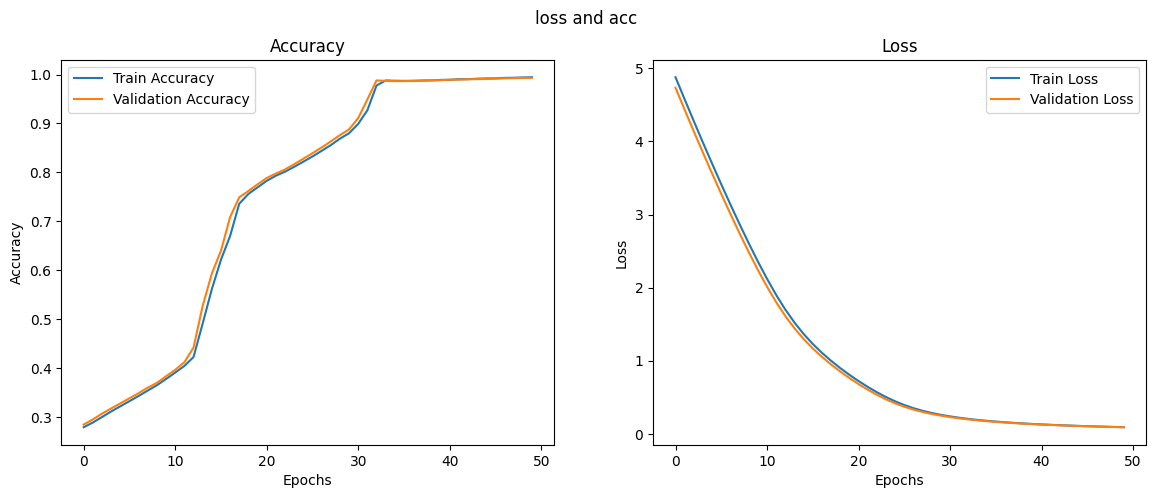

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(hist.history["accuracy"], label="Train Accuracy")
ax1.plot(hist.history["val_accuracy"], label="Validation Accuracy")
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(hist.history["loss"], label="Train Loss")
ax2.plot(hist.history["val_loss"], label="Validation Loss")
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

fig.suptitle("loss and acc")
